## BANK MARKETING

This project takes data related to direct marketing campaign with a goal to predict whether the client will subscribe a term deposit.

Data comes from Portuguese bank and contains the information about marketing campaigns based on phone calls.

Source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/bank+marketing)

Task: classification    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path,header=0, sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(str(df.shape[0]) + ' rows')
print(str(df.shape[1]) + ' columns')

41188 rows
21 columns


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
# read data again with specified data types
df = pd.read_csv(file_path, header=0, decimal='.', sep=';', 
                 dtype = {1:'category',2:'category',3:'category',
                          4:'category',5:'category',6:'category',
                          7:'category',8:'category',9:'category',14:'category',20:'category'})

In [7]:
# check data types and number of nulls
summary = pd.DataFrame(df.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(df.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(df.isnull().sum())
summary['Per_of_nulls'] = round((df.apply(pd.isnull).mean()*100),2)
summary.Dtype = summary.Dtype.astype(str)
print(summary)
## what is the % of observations containing nulls
print("% of observations containing nulls:")
print((df.isnull().any(axis=1).sum()/df.shape[0])*100)

                   Dtype  Nulls  Sum_of_nulls  Per_of_nulls
age                int64  False             0           0.0
job             category  False             0           0.0
marital         category  False             0           0.0
education       category  False             0           0.0
default         category  False             0           0.0
housing         category  False             0           0.0
loan            category  False             0           0.0
contact         category  False             0           0.0
month           category  False             0           0.0
day_of_week     category  False             0           0.0
duration           int64  False             0           0.0
campaign           int64  False             0           0.0
pdays              int64  False             0           0.0
previous           int64  False             0           0.0
poutcome        category  False             0           0.0
emp.var.rate     float64  False         

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.select_dtypes(['category']).describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
# convert target variable to binary
df.y.replace('yes',1, inplace=True)
df.y.replace('no',0, inplace=True)
df['y'] = df['y'].astype('uint8')

In [11]:
# Distribution of target variable
count = df.groupby('y').size()
percent = count/len(df)*100
print(percent)

y
0    88.734583
1    11.265417
dtype: float64


Target variable in unevenly distributed. More than 80% of observations are "NO" and only 11% are "YES"

## Analysis of categorical variables

#### Job

In [12]:
cat = pd.DataFrame(df['job'].value_counts())
cat.rename(columns={'job':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.job,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

               num_of_obs  Per_of_obs
admin.              10422   25.303486
blue-collar          9254   22.467709
technician           6743   16.371273
services             3969    9.636302
management           2924    7.099155
retired              1720    4.175974
entrepreneur         1456    3.535010
self-employed        1421    3.450034
housemaid            1060    2.573565
unemployed           1014    2.461882
student               875    2.124405
unknown               330    0.801204
                   
                   
y                 0     1  NO_ratio
job                                
admin.         9070  1352  0.870274
blue-collar    8616   638  0.931057
entrepreneur   1332   124  0.914835
housemaid       954   106  0.900000
management     2596   328  0.887825
retired        1286   434  0.747674
self-employed  1272   149  0.895144
services       3646   323  0.918619
student         600   275  0.685714
technician     6013   730  0.891740
unemployed      870   144  0.85798

I will remove unknowns as they make tiny fraction of observations.

In [13]:
df = df[df["job"] != "unknown"]

#### Marital

In [14]:
cat = pd.DataFrame(df['marital'].value_counts())
cat.rename(columns={'marital':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.marital,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

          num_of_obs  Per_of_obs
married        24694   60.438592
single         11494   28.131578
divorced        4599   11.256058
unknown           71    0.173773
                   
                   
y             0     1  NO_ratio
marital                        
divorced   4126   473  0.897152
married   22178  2516  0.898113
single     9889  1605  0.860362
unknown      62     9  0.873239


In [15]:
df = df[df["marital"] != "unknown"]

#### Education

In [16]:
cat = pd.DataFrame(df['education'].value_counts())
cat.rename(columns={'education':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.education,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

                     num_of_obs  Per_of_obs
university.degree         12096   29.656508
high.school                9464   23.203472
basic.9y                   6006   14.725280
professional.course        5225   12.810454
basic.4y                   4118   10.096354
basic.6y                   2264    5.550788
unknown                    1596    3.913011
illiterate                   18    0.044132
                   
                   
y                        0     1  NO_ratio
education                                 
basic.4y              3695   423  0.897280
basic.6y              2077   187  0.917403
basic.9y              5536   470  0.921745
high.school           8436  1028  0.891378
illiterate              14     4  0.777778
professional.course   4631   594  0.886316
university.degree    10442  1654  0.863261
unknown               1362   234  0.853383


Within "education" variable perentage of unknowns is significantly higher. I will impute it with mode value.

In [17]:
col_values = df["education"].values
df["education"] = np.where(col_values=='unknown', df["education"].mode(), col_values)

##### Default

In [18]:
cat = pd.DataFrame(df['default'].value_counts())
cat.rename(columns={'default':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.default,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

         num_of_obs  Per_of_obs
no            32348   79.309584
unknown        8436   20.683061
yes               3    0.007355
                   
                   
y            0     1  NO_ratio
default                       
no       28190  4158  0.871460
unknown   8000   436  0.948317
yes          3     0  1.000000


This variable has many unknowns and is highly unbalanced. I will drop it from the dataset.


In [19]:
df.drop("default", axis=1, inplace=True)

##### Housing

In [20]:
cat = pd.DataFrame(df['housing'].value_counts())
cat.rename(columns={'housing':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.housing,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

         num_of_obs  Per_of_obs
yes           21376   52.408856
no            18427   45.178611
unknown         984    2.412533
                   
                   
y            0     1  NO_ratio
housing                       
no       16423  2004  0.891247
unknown    877   107  0.891260
yes      18893  2483  0.883842


Taking into account the share of unknowns and its "NO_ratio" I will impute "no" instead of "unknown"

In [21]:
col_values = df["housing"].values
df["housing"] = np.where(col_values=='unknown', df["housing"].mode(), col_values)

In [22]:
df.housing.value_counts()

yes    22360
no     18427
Name: housing, dtype: int64

In [23]:
df.job.value_counts()

admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
unknown              0
Name: job, dtype: int64

##### Loan

In [24]:
cat = pd.DataFrame(df['loan'].value_counts())
cat.rename(columns={'loan':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.loan,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

         num_of_obs  Per_of_obs
no            33620   82.428225
yes            6183   15.159242
unknown         984    2.412533
                   
                   
y            0     1  NO_ratio
loan                          
no       29811  3809  0.886704
unknown    877   107  0.891260
yes       5505   678  0.890344


##### Contact

In [25]:
cat = pd.DataFrame(df['contact'].value_counts())
cat.rename(columns={'contact':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.contact,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

           num_of_obs  Per_of_obs
cellular        25928   63.569275
telephone       14859   36.430725
                   
                   
y              0     1  NO_ratio
contact                         
cellular   22110  3818  0.852746
telephone  14083   776  0.947776


##### Month

In [26]:
cat = pd.DataFrame(df['month'].value_counts())
cat.rename(columns={'month':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.month,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

     num_of_obs  Per_of_obs
may       13619   33.390541
jul        7118   17.451639
aug        6108   14.975360
jun        5245   12.859490
nov        4087   10.020350
apr        2620    6.423615
oct         707    1.733395
sep         562    1.377890
mar         541    1.326403
dec         180    0.441317
                   
                   
y          0    1  NO_ratio
month                      
apr     2083  537  0.795038
aug     5462  646  0.894237
dec       92   88  0.511111
jul     6476  642  0.909806
jun     4697  548  0.895520
mar      267  274  0.493530
may    12737  882  0.935238
nov     3674  413  0.898948
oct      396  311  0.560113
sep      309  253  0.549822


Month variable does not make much sense from the interpretation point of view. We do not even know what point in time is the zero state. I will drop it from the dataset.

In [27]:
df.drop("month", axis=1, inplace=True)

#### Day of week

In [28]:
cat = pd.DataFrame(df['day_of_week'].value_counts())
cat.rename(columns={'day_of_week':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.day_of_week,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

     num_of_obs  Per_of_obs
thu        8530   20.913526
mon        8420   20.643833
wed        8052   19.741584
tue        8006   19.628803
fri        7779   19.072253
                   
                   
y               0     1  NO_ratio
day_of_week                      
fri          6940   839  0.892146
mon          7579   841  0.900119
thu          7497  1033  0.878898
tue          7060   946  0.881839
wed          7117   935  0.883880


##### poutcome

In [29]:
cat = pd.DataFrame(df['poutcome'].value_counts())
cat.rename(columns={'poutcome':"num_of_obs"},inplace=True)
cat['Per_of_obs'] = cat['num_of_obs']/df.shape[0]*100
print(cat)
print("                   ")
print("                   ")
x = pd.crosstab(df.poutcome,df.y)
x["NO_ratio"] = x.iloc[:,0] /(x.iloc[:,0]+ x.iloc[:,1])
print(x)

             num_of_obs  Per_of_obs
nonexistent       35217   86.343688
failure            4221   10.348886
success            1349    3.307426
                   
                   
y                0     1  NO_ratio
poutcome                          
failure       3626   595  0.859038
nonexistent  32103  3114  0.911577
success        464   885  0.343958


## Analysis of numerical variables

In [30]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000
mean,39.978817,258.329811,2.566112,962.725427,0.172874,0.080516,93.574804,-40.515770,3.619532,5167.017866,0.112634
std,10.402157,259.269596,2.768103,186.293432,0.494863,1.570133,0.578558,4.626805,1.734416,72.231843,0.316149
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.500000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


From the table it can be observed that some variables have outliers. They will dealt with using 1.5IQR method or with Min-Max approach.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Age

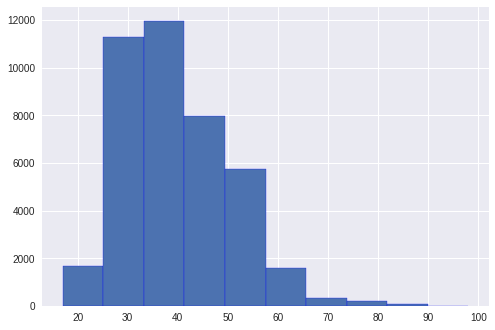

In [32]:
plt.hist(df.age, edgecolor="b")
plt.show()

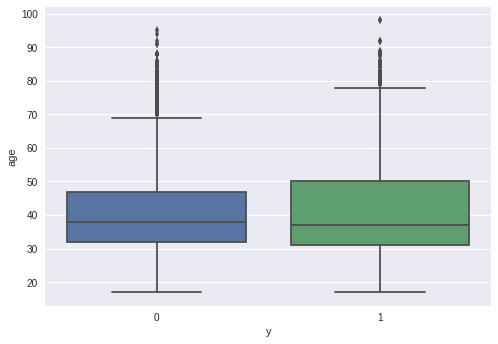

In [33]:
sns.boxplot(x = "y", y="age", data=df)
plt.show()

##### Duration

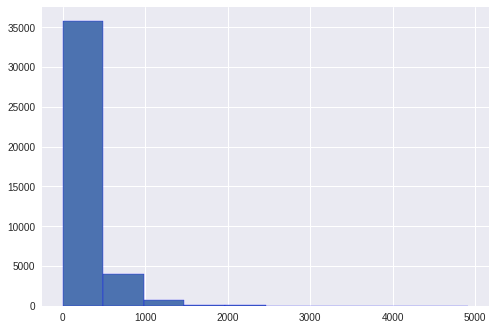

In [34]:
plt.hist(df.duration, edgecolor="b")
plt.show()

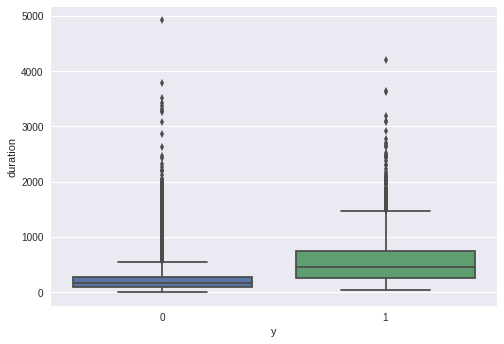

In [35]:
sns.boxplot(x = "y", y="duration", data=df)
plt.show()

Based on the graphs, I define outliers as values exceeding 2500. Those will be replaced with mean.

In [33]:
col_values = df["duration"].values
df["duration"] = np.where(col_values>2500, col_values.mean(), col_values)

##### Campaign

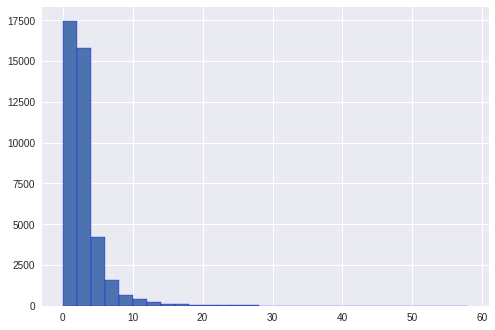

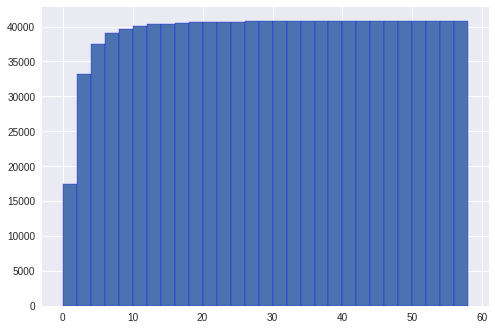

In [37]:
plt.hist(df.campaign,bins = np.arange(0, 60, 2), edgecolor="b")
plt.show()
plt.hist(df.campaign,bins = np.arange(0, 60, 2),cumulative=True, edgecolor="b")
plt.show()

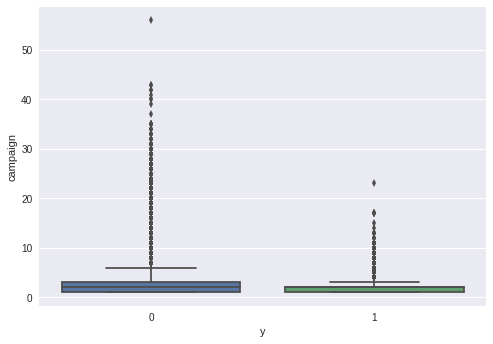

In [38]:
sns.boxplot(x = "y", y="campaign", data=df)
plt.show()

I will use value 20 as cut off.

In [34]:
col_values = df["campaign"].values
df["campaign"] = np.where(col_values>20, col_values.mean(), col_values)

##### Pdays

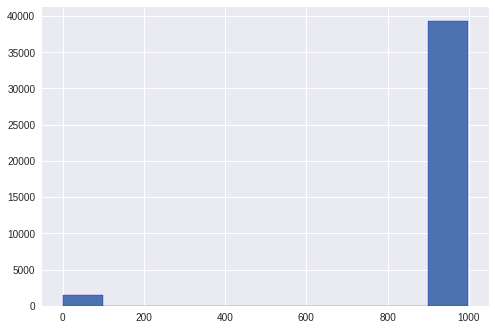

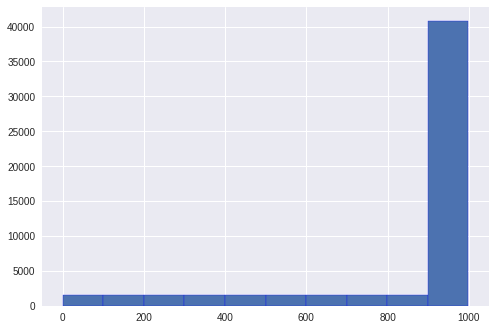

In [40]:
plt.hist(df.pdays, edgecolor="b")
plt.show()
plt.hist(df.pdays,cumulative=True, edgecolor="b")
plt.show()

In [41]:
df.pdays.value_counts()

999    39297
3        431
6        404
4        116
9         64
7         60
2         59
12        58
10        52
5         46
13        35
11        27
1         25
15        24
14        20
8         17
0         15
16        10
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

"pdays" variable is highly unbalanced and imputing mean or median does not make any sense. Over 95% of clients were not contacted before (value 999). I will exclude it from the dataset.

In [35]:
df.drop("pdays", axis=1, inplace=True)

##### Previous

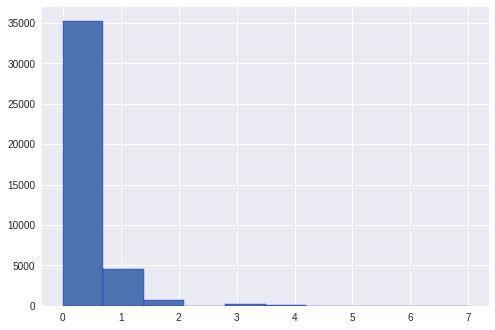

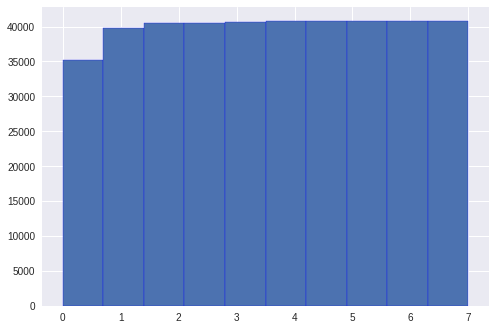

In [43]:
plt.hist(df.previous, edgecolor="b")
plt.show()
plt.hist(df.previous,cumulative=True, edgecolor="b")
plt.show()

In [44]:
df.previous.value_counts()

0    35217
1     4522
2      740
3      214
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Another variable which is highly unbalanced. 86% of clients were not previously contacted during this campaign. I will try to make it a binary variable.

In [36]:
col_values = df["previous"].values
df["previous"] = np.where(col_values>0, 1, 0)

Last variables are economic indicators. I will remove them from the dataset as they are not customer-specific.

In [37]:

df.drop(["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"], axis=1, inplace=True)

In [38]:
df.describe()

,age,duration,campaign,previous,y
count,40787.000000,40787.000000,40787.000000,40787.000000,40787.000000
mean,39.978817,256.590897,2.473173,0.136563,0.112634
std,10.402157,248.800116,2.295204,0.343390,0.316149
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,102.000000,1.000000,0.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000,0.000000
max,98.000000,2486.000000,20.000000,1.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40787 entries, 0 to 41187
Data columns (total 13 columns):
age            40787 non-null int64
job            40787 non-null category
marital        40787 non-null category
education      40787 non-null object
housing        40787 non-null object
loan           40787 non-null category
contact        40787 non-null category
day_of_week    40787 non-null category
duration       40787 non-null float64
campaign       40787 non-null float64
previous       40787 non-null int64
poutcome       40787 non-null category
y              40787 non-null uint8
dtypes: category(6), float64(2), int64(2), object(2), uint8(1)
memory usage: 2.5+ MB


## Preparation for modelling

In [40]:
df_y = df["y"]
df_x = df.drop("y", axis=1)

In [41]:
df_x.shape

(40787, 12)

In [42]:
df_x_with_dummies = pd.get_dummies(df_x)

In [43]:
df_x_with_dummies.columns

Index(['age', 'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [44]:
df_x_with_dummies.shape

(40787, 42)

In [45]:
df_x_with_dummies["marital_unknown"].value_counts()

0    40787
Name: marital_unknown, dtype: int64

In [46]:
df_x_with_dummies.drop("job_unknown", axis=1, inplace=True)
df_x_with_dummies.drop("marital_unknown", axis=1, inplace=True)

In [47]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [48]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [49]:
# split to train and test

x_train, x_test, y_train, y_test = train_test_split(df_x_with_dummies,df_y,test_size=0.2, stratify=df_y)

In [50]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.88737
1    0.11263
Name: y, dtype: float64
0    0.88735
1    0.11265
Name: y, dtype: float64


## Model selection

As the first step I will run different classification models in order to compare their accuracy results. Next I will pick the best models and try to optimize them.

In [53]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


In [54]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.904563 (0.004570)


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are colli

LDA: 0.903184 (0.005702)
KNN: 0.885010 (0.004657)
TREE: 0.859174 (0.004385)
NB: 0.829415 (0.004478)


In the first approach Logistic Regression and Linear Discriminant Analysis produce the best results.

### Logistic Regression

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [56]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])
pipe.fit(x_train, y_train)
pred = pipe.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.907


#### Optimize parameters

In [57]:
params = [{"standarization__with_mean":[True,False], "LogisticRegression__C":[0.2,0.5,1,1.5,2,4,6],
           "LogisticRegression__penalty":["l1","l2"]}]

In [58]:
gs = GridSearchCV(estimator=pipe,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'standarization__with_mean': [True, False], 'LogisticRegression__C': [0.2, 0.5, 1, 1.5, 2, 4, 6], 'LogisticRegression__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
gs.best_params_

{'LogisticRegression__C': 1,
 'LogisticRegression__penalty': 'l1',
 'standarization__with_mean': True}

In [60]:
accuracy_score(gs.best_estimator_.predict(x_test),y_test)

0.9068399117430743

The accuracy result has not improved. In the next step I will calculate ROC AUC and compare to second best model - LDA.

In [61]:
print(classification_report(y_test, gs.best_estimator_.predict(x_test)))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95      7239
          1       0.67      0.34      0.45       919

avg / total       0.89      0.91      0.89      8158



One can notice that the model has a tendency to classify most of observations as 0 - low recall for 1. It is most likely driven by the fact that the classes are highly unbalanced.

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.8857843073149445

AUC for Logistic Regression is 0,89. Let us compare it to AUC for LDA.

### LDA

In [65]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X=x_train,y=y_train)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [66]:
lda_model.predict(x_test)
preds = lda_model.predict(x_test)
preds_prob = lda_model.predict_proba(x_test)[:,1]
score = accuracy_score(y_pred=preds, y_true=y_test)
print(score)
print(roc_auc_score(y_true=y_test, y_score=preds_prob))

0.9061044373620986
0.8857465779379948


In [67]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7239
          1       0.63      0.41      0.50       919

avg / total       0.89      0.91      0.90      8158



In [68]:
from sklearn.metrics import roc_curve

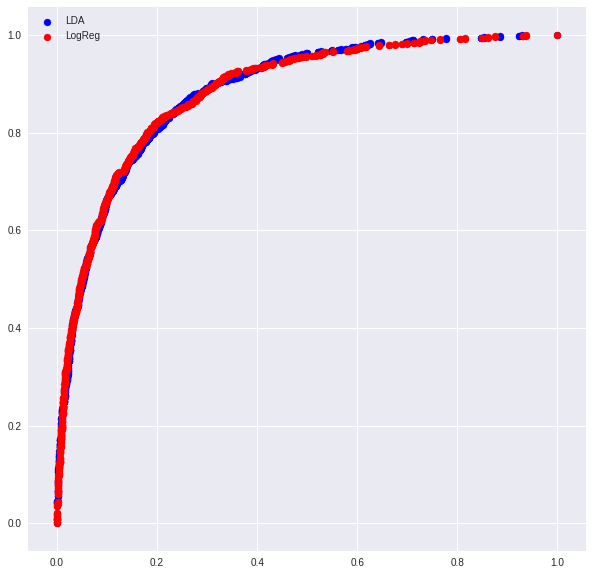

In [69]:
roc_result = roc_curve(y_true=y_test, y_score=preds_prob)
fpr, tpr, _ = roc_result

roc_result_2 = roc_curve(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])
fpr2, tpr2, _2 = roc_result_2

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(fpr, tpr, c="blue", label = "LDA")
plt.scatter(fpr2, tpr2, c="red", label = "LogReg")
plt.legend()
plt.show()

Both models produce similar results. The results are not impressive considering the ditribution of target variable. 

As a next step I will check how the models perform on balanced classes. I will use undersampling approach.

#### Undersampling

In [70]:
df.y.value_counts()

0    36193
1     4594
Name: y, dtype: int64

In [71]:
df1 = df[df['y']==0].sample(n=4594)
df2 = df[df['y']==1]
print(df1.shape)
print(df2.shape)

(4594, 13)
(4594, 13)


In [72]:
df_undersampled = pd.concat([df1,df2])
df_undersampled.shape

(9188, 13)

In [73]:
df_undersampled_y = df_undersampled["y"]
df_undersampled_x = df_undersampled.drop("y", axis=1)

In [74]:
df_undersampled_x_with_dummies = pd.get_dummies(df_undersampled_x)

In [75]:
df_undersampled_x_with_dummies.drop("job_unknown", axis=1, inplace=True)
df_undersampled_x_with_dummies.drop("marital_unknown", axis=1, inplace=True)

In [76]:
x_train, x_test, y_train, y_test = train_test_split(df_undersampled_x_with_dummies,
                                                    df_undersampled_y,test_size=0.2, stratify=df_undersampled_y)

In [77]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

1    0.5
0    0.5
Name: y, dtype: float64
1    0.5
0    0.5
Name: y, dtype: float64


### Logistic Regression

In [83]:
pipe = Pipeline([("standarization",StandardScaler()),("LogisticRegression",LogisticRegression())])
pipe.fit(x_train, y_train)
pred_train = pipe.predict(x_train)
pred_test = pipe.predict(x_test)

print('Benchmark: ' + str(round(accuracy_score(pred_train, y_train),3)))
print('Accuracy on test: ' + str(round(accuracy_score(pred_test, y_test),3)))

Benchmark: 0.813
Accuracy on test: 0.813


#### Optimize parameters

In [84]:
params = [{"standarization__with_mean":[True,False], "LogisticRegression__C":[0.05,0.1,0.2,0.5,1,1.5],
           "LogisticRegression__penalty":["l1","l2"]}]

In [85]:
gs = GridSearchCV(estimator=pipe,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('standarization', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'standarization__with_mean': [True, False], 'LogisticRegression__C': [0.05, 0.1, 0.2, 0.5, 1, 1.5], 'LogisticRegression__penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
gs.best_params_

{'LogisticRegression__C': 0.2,
 'LogisticRegression__penalty': 'l1',
 'standarization__with_mean': False}

In [87]:
accuracy_score(gs.best_estimator_.predict(x_test),y_test)

0.8112078346028292

For dataset with balanced classes accuracy result on test is 81%. The result is also improved by taking lower C parameter.

In [88]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.8971513010901521

In [90]:
print(classification_report(y_test, gs.best_estimator_.predict(x_test)))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       919
          1       0.83      0.78      0.80       919

avg / total       0.81      0.81      0.81      1838



### LDA

In [91]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X=x_train,y=y_train)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [92]:
lda_model.predict(x_test)
preds = lda_model.predict(x_test)
preds_prob = lda_model.predict_proba(x_test)[:,1]
score = accuracy_score(y_pred=preds, y_true=y_test)
print(score)
print(roc_auc_score(y_true=y_test, y_score=preds_prob))

0.8052230685527747
0.8938868832446679


Again results for LDA are comparable to Logistic Regression.

In [93]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.77      0.87      0.82       919
          1       0.85      0.74      0.79       919

avg / total       0.81      0.81      0.80      1838



Both models have similar precision. For Logistic Regression 78% of actual positive responses are correctly predicted. For LDA it is 74%. Precision and recall for positive responses is significantly higher than in previous models based on unbalanced classes.

As the last step I will check whether I can obtain better results on balanced classes using Decision Tree Model with parameters optimization.

## Decision Tree

In [94]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('Benchmark: ' + str(round(accuracy_score(pred, y_test),3)))

Benchmark: 0.758


In [95]:
params = {'criterion':('entropy','gini'),
         'splitter':('best','random'),
         'max_depth':(2,3,4,5,6,7,8,9,10),
         'min_samples_split':(2,3,4,5,6,7,8,9,10),
         'min_samples_leaf':(3,4,5)}

gs = GridSearchCV(model, params,cv=10)


In [96]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ('entropy', 'gini'), 'splitter': ('best', 'random'), 'max_depth': (2, 3, 4, 5, 6, 7, 8, 9, 10), 'min_samples_split': (2, 3, 4, 5, 6, 7, 8, 9, 10), 'min_samples_leaf': (3, 4, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [97]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'best'}

In [98]:
cv = cross_val_score(DecisionTreeClassifier(**gs.best_params_), x_train, y_train, cv = 10, scoring = 'accuracy')
print('Average Accuracy: ' + str(cv.mean().round(3)))

Average Accuracy: 0.815


In [106]:

print('Accuracy on test: ' + str(accuracy_score(y_pred=gs.predict(x_test), y_true=y_test)))

Accuracy on test: 0.8030467899891186


Optimization of Decision Tree parameters resulted in accuracy comparable to LDA and Logistic Regression.

In [107]:
roc_auc_score(y_true=y_test, y_score=gs.best_estimator_.predict_proba(x_test)[:,1])

0.8822832216974263